Use "5_realtor_data.csv" to answer the following questions  
The data file should be saved in the project folder  
Review the code we have learned in class when completing these questions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("5_realtor_data.csv") 
df.head()

,Home Type,Zip,Listing Price,Baths,Beds,SQFT,Year Built,Airbnb Cash on Cash
0,Single Family Residential,61822,685000,5.0,3,2840.0,2010.0,0.834059
1,Single Family Residential,61822,349900,3.0,4,1926.0,2016.0,1.349840
2,Townhouse,61822,194900,3.0,3,1600.0,2017.0,8.629820
3,Single Family Residential,61820,126900,2.0,3,1330.0,1959.0,14.517200
4,Single Family Residential,61822,369900,4.0,4,2336.0,2006.0,1.116810


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Home Type            296 non-null    object 
 1   Zip                  296 non-null    int64  
 2   Listing Price        296 non-null    int64  
 3   Baths                294 non-null    float64
 4   Beds                 296 non-null    int64  
 5   SQFT                 294 non-null    float64
 6   Year Built           273 non-null    float64
 7   Airbnb Cash on Cash  296 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 18.6+ KB


In [4]:
# Convert Zip to categorical
df['Zip'] = df['Zip'].astype('category')

# Convert Baths to categorical
# First convert to string to preserve decimal values like 1.5 baths
df['Baths'] = df['Baths'].astype(str).astype('category')

# Convert Beds to categorical
df['Beds'] = df['Beds'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Home Type            296 non-null    object  
 1   Zip                  296 non-null    category
 2   Listing Price        296 non-null    int64   
 3   Baths                296 non-null    category
 4   Beds                 296 non-null    category
 5   SQFT                 294 non-null    float64 
 6   Year Built           273 non-null    float64 
 7   Airbnb Cash on Cash  296 non-null    float64 
dtypes: category(3), float64(3), int64(1), object(1)
memory usage: 13.2+ KB


1.	Present summary statistics for all the numeric variables (min, max, mean, standard deviation).

In [6]:
df.describe()

,Listing Price,SQFT,Year Built,Airbnb Cash on Cash
count,296.000000,294.000000,273.000000,296.000000
mean,225782.037162,2002.656463,1979.472527,7.371624
std,147640.909051,994.326109,30.089697,6.247464
min,77100.000000,704.000000,1855.000000,-1.125820
25%,119999.750000,1322.500000,1960.000000,2.284272
50%,172350.000000,1704.000000,1985.000000,5.056220
75%,285675.000000,2396.000000,2004.000000,12.357400
max,989000.000000,7040.000000,2017.000000,25.179400


2.	How many listings are there for each "Home Type"?

In [9]:
df['Home Type'].value_counts()

Single Family Residential    246
Condo/Coop                    39
Townhouse                     11
Name: Home Type, dtype: int64

3.	What are the  average and standard deviation of listing prices by zipcode? (use groupby method)

In [29]:
print("Average")
df.groupby('Zip')['Listing Price'].mean()

Average


Zip
61820    193976.000000
61821    148634.424528
61822    295553.100000
Name: Listing Price, dtype: float64

In [30]:
print("Standard Deviation")
df.groupby('Zip')['Listing Price'].std()

Standard Deviation


Zip
61820    147340.310735
61821     74111.616215
61822    157016.011981
Name: Listing Price, dtype: float64

4. Present histograms of listing price

array([[<AxesSubplot:title={'center':'Listing Price'}>]], dtype=object)

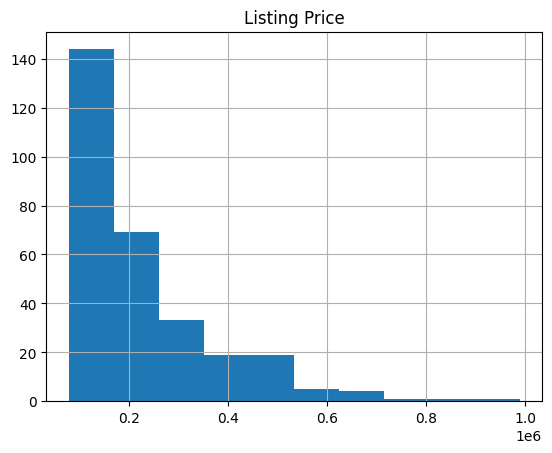

In [16]:
df[['Listing Price']].hist()

5. How many 1,2,3,and 4 bedroom houses are listed in each Zip? (Crosstab)

In [17]:
pd.crosstab(df['Beds'], df['Zip'])

Zip,61820,61821,61822
Beds,,,
1,1,0,0
2,17,16,16
3,24,66,53
4,8,24,71


6. Present scatter plot for two variables, and briefly summarize what information you can learn from the plot 


<AxesSubplot:xlabel='Year Built', ylabel='Listing Price'>

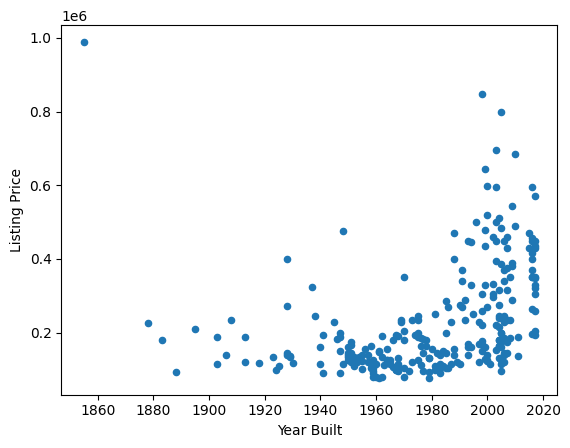

In [ ]:
df.plot(kind='scatter', x='Year Built', y='Listing Price')

# The scatter plot shows that houses built within the same years are more likely to have similar prices.

7. (Open-Ended Analysis) As a data analyst helping a client select a property for Airbnb investment,   
develop a data-driven search strategy. Use the available dataset to:  

    Analyze relationships between property characteristics and potential returns  
    Provide recommendations backed by statistical analysis  
    Include visualizations and statistical evidence to support your recommendations.  

<AxesSubplot:xlabel='Year Built', ylabel='Listing Price'>

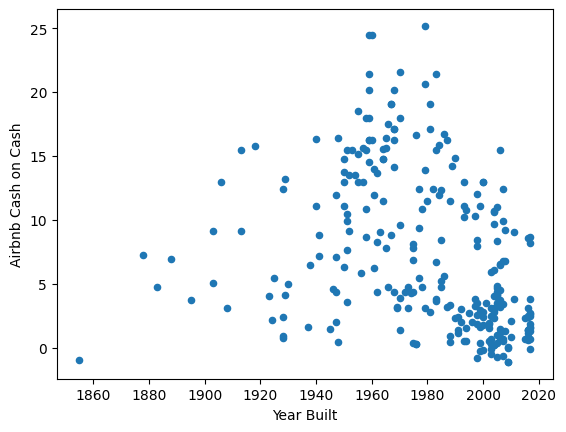

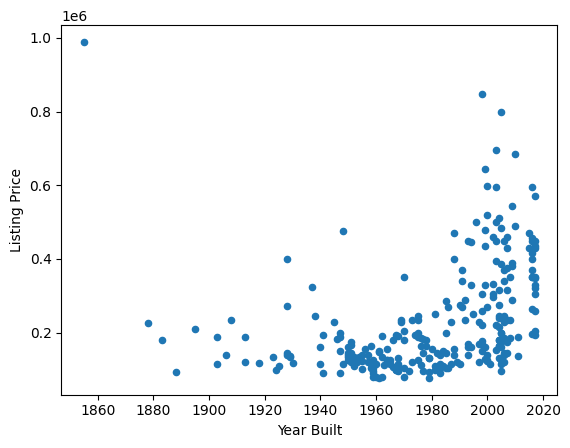

In [ ]:
df.plot(kind='scatter', x='Year Built', y='Airbnb Cash on Cash')
df.plot(kind='scatter', x='Year Built', y='Listing Price')

# Based on the scatter plots your best return on investment would be to look for house built between 1950 and 1990
# The reason this is the bet ROI is because the house built during this time period have cheaper list prices but higher cash on cash returns.